# Library

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, recall_score, precision_score

# Data

In [3]:
churn_data=pd.read_csv('./data/churn.csv')

In [143]:
#Assigning Literals
last_trip_date='last_trip_date'
sign_up_date='signup_date'
Status_Label='Churn'

In [14]:
print churn_data.shape
churn_data.head()

(50000, 13)


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Days_diff
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,143 days
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,96 days
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1 days
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,170 days
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,47 days


In [5]:
churn_data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,0.37708,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,0.4846601,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,False,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,0,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,0,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,1,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,True,100.000000


In [6]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [7]:
churn_data.corr()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
avg_dist,1.000000,0.080540,0.034509,-0.081491,-0.104414,-0.136329,0.032310,0.101652
avg_rating_by_driver,0.080540,1.000000,0.123175,0.010597,0.020103,-0.039115,0.009343,0.020442
avg_rating_of_driver,0.034509,0.123175,1.000000,-0.026189,-0.003899,-0.011302,-0.002086,0.014630
avg_surge,-0.081491,0.010597,-0.026189,1.000000,0.793582,-0.001841,-0.078791,-0.110071
surge_pct,-0.104414,0.020103,-0.003899,0.793582,1.000000,0.005720,-0.106861,-0.144918
trips_in_first_30_days,-0.136329,-0.039115,-0.011302,-0.001841,0.005720,1.000000,0.112210,0.050388
luxury_car_user,0.032310,0.009343,-0.002086,-0.078791,-0.106861,0.112210,1.000000,0.035998
weekday_pct,0.101652,0.020442,0.014630,-0.110071,-0.144918,0.050388,0.035998,1.000000


In [76]:
churn_data[last_trip_date] =  pd.to_datetime(churn_data[last_trip_date],format = '%Y-%m-%d')
churn_data[sign_up_date] =  pd.to_datetime(churn_data[sign_up_date],format = '%Y-%m-%d')

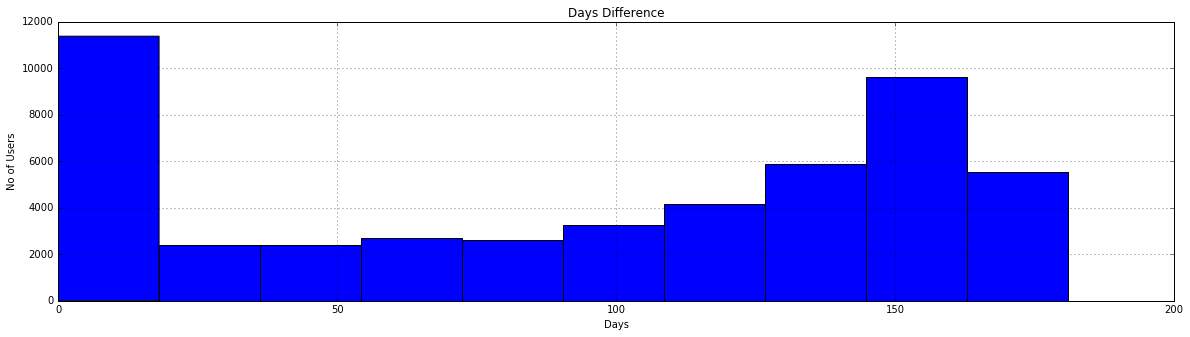

In [81]:
plt.figure(figsize=(20,5))
churn_data['Days_diff'] = churn_data.last_trip_date - churn_data.signup_date
churn_data.Days_diff.astype('timedelta64[D]').hist(bins = 10)
plt.title('Days Difference')
plt.xlabel('Days')
plt.ylabel('No of Users')

In [80]:
churn_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Days_diff,Days_Last_Used,churn
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,143 days,14 days,Churn
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,96 days,57 days,Churn
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1 days,175 days,Active
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,170 days,2 days,Churn
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,47 days,108 days,Churn


In [51]:
churn_data.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
Days_diff                    0
Days_Last_Used               0
churn                        0
dtype: int64

In [97]:
# change this to a better logic, max might not always be the latest date
last = max(churn_data.last_trip_date) - timedelta(days=30)

In [102]:
churn_data['Churn']=np.where(churn_data.last_trip_date>=last,'churn','active')

In [106]:
#churn_data.drop('churn',axis=1,inplace=True)

In [107]:
churn_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Days_diff,Days_Last_Used,Churn
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,143 days,churn,churn
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,96 days,active,active
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1 days,active,active
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,170 days,churn,churn
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,47 days,active,active


In [108]:
churn_data['Churn'].value_counts()

active    31196
churn     18804
dtype: int64

In [116]:
churn_data.drop('Days_Last_Used',axis=1,inplace=True)

In [117]:
churn_data.isnull().sum()

avg_dist                    150
avg_rating_by_driver        201
avg_rating_of_driver       8122
avg_surge                     0
city                          0
last_trip_date                0
phone                       396
signup_date                   0
surge_pct                 34409
trips_in_first_30_days    15390
luxury_car_user               0
weekday_pct                9203
Days_diff                  2302
Churn                         0
dtype: int64

In [121]:
churn_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Days_diff,Churn
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,143 days,churn
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,NaN,NaN,False,50.0,96 days,active
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,NaN,3,False,100.0,1 days,active
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,170 days,churn
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,47 days,active


In [122]:
list_of_cols=['phone','city','last_trip_date','signup_date','luxury_car_user','Days_diff']
feature_df=churn_data.drop(list_of_cols,axis=1)

In [123]:
feature_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,Churn
0,3.67,5.0,4.7,1.10,15.4,4,46.2,churn
1,8.26,5.0,5.0,1.00,NaN,NaN,50.0,active
2,0.77,5.0,4.3,1.00,NaN,3,100.0,active
3,2.36,4.9,4.6,1.14,20.0,9,80.0,churn
4,3.13,4.9,4.4,1.19,11.8,14,82.4,active


In [124]:
feature_df.isnull().sum()

avg_dist                    150
avg_rating_by_driver        201
avg_rating_of_driver       8122
avg_surge                     0
surge_pct                 34409
trips_in_first_30_days    15390
weekday_pct                9203
Churn                         0
dtype: int64

In [128]:
per_null = feature_df.isnull().sum()/len(feature_df)*100
per_null

avg_dist                   0.300
avg_rating_by_driver       0.402
avg_rating_of_driver      16.244
avg_surge                  0.000
surge_pct                 68.818
trips_in_first_30_days    30.780
weekday_pct               18.406
Churn                      0.000
dtype: float64

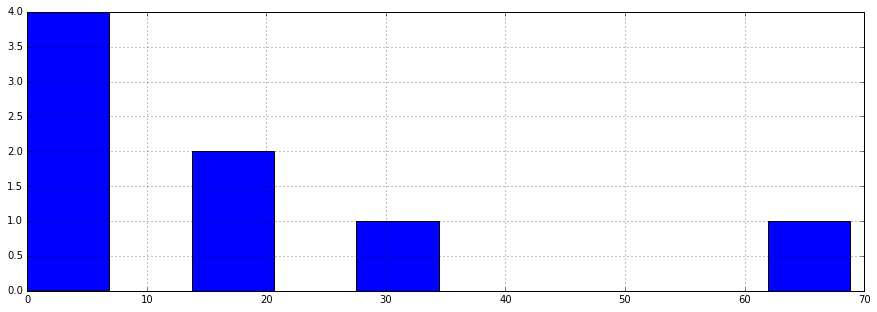

In [126]:
# plot histogram of
plt.figure(figsize=(15,5))
per_null.hist()

In [136]:
feature_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,Churn
0,3.67,5.0,4.7,1.10,15.4,4,46.2,churn
1,8.26,5.0,5.0,1.00,NaN,NaN,50.0,active
2,0.77,5.0,4.3,1.00,NaN,3,100.0,active
3,2.36,4.9,4.6,1.14,20.0,9,80.0,churn
4,3.13,4.9,4.4,1.19,11.8,14,82.4,active


In [137]:
#dropping columns which have more than 50% of null data.
feature_df.drop('surge_pct',axis=1,inplace=True)

In [138]:
feature_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,trips_in_first_30_days,weekday_pct,Churn
0,3.67,5.0,4.7,1.10,4,46.2,churn
1,8.26,5.0,5.0,1.00,NaN,50.0,active
2,0.77,5.0,4.3,1.00,3,100.0,active
3,2.36,4.9,4.6,1.14,9,80.0,churn
4,3.13,4.9,4.4,1.19,14,82.4,active


In [139]:
feature_df.fillna(0,inplace=True)

In [140]:
feature_df['Churn'].value_counts()

active    31196
churn     18804
dtype: int64

In [172]:
x=feature_df.dropna(how='any')
y=x.pop(Status_Label)


 iteration= 0
0.720533333333
confusion matrix 
[[5874 1845]
 [3591 1190]]
recall = 0.447716602646
precision = 0.691268533773

 iteration= 1
0.72072
confusion matrix 
[[5823 1896]
 [3637 1144]]
recall = 0.444870974621
precision = 0.686184210526

 iteration= 2
0.718693333333
confusion matrix 
[[5903 1816]
 [3707 1074]]
recall = 0.433064173396
precision = 0.705190311419

 iteration= 3
0.7192
confusion matrix 
[[5825 1894]
 [3579 1202]]
recall = 0.467842546784
precision = 0.702519379845

 iteration= 4
0.721306666667
confusion matrix 
[[5889 1830]
 [3643 1138]]
recall = 0.434412265758
precision = 0.687331536388

 iteration= 5
0.72168
confusion matrix 
[[5773 1946]
 [3620 1161]]
recall = 0.459361702128
precision = 0.694882523334

 iteration= 6
0.72288
confusion matrix 
[[5837 1882]
 [3615 1166]]
recall = 0.447379633575
precision = 0.688976377953

 iteration= 7
0.7188
confusion matrix 
[[5903 1816]
 [3665 1116]]
recall = 0.439333192657
precision = 0.710095497954

 iteration= 8
0.729093333333

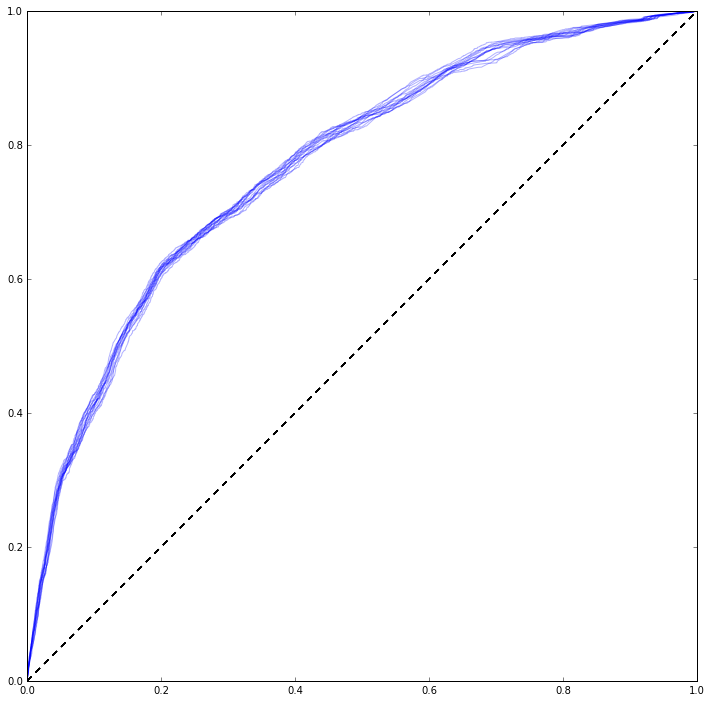

In [192]:
#X_train,X_test,y_train,y_test=train_test_split(x,y)
plt.figure(figsize=(12,12))
clf=RandomForestClassifier(n_estimators=1000,max_depth=3,oob_score=True,n_jobs=-1)
for i in range(15):
    X_train,X_test,y_train,y_test=train_test_split(x,y)
    clf.fit(X_train,y_train)
    print '\n iteration=',i
    print clf.oob_score_
    probas_= clf.predict_proba(X_test)
    class_label_= clf.predict(X_test)
    
    fpr,tpr,thresholds= roc_curve(y_test,probas_[:,1],pos_label=churn)
    
    conf_matrix = confusion_matrix(ytest, class_label_)
    print "confusion matrix \n",conf_matrix
    print "recall =", recall_score(y_test, class_label_, pos_label=churn)
    print "precision =",precision_score(y_test, class_label_, pos_label=churn)
    
    plt.plot(fpr,tpr,color='blue',alpha=0.3)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    


In [184]:
def new_model(featureDf,targetVariable,churnLabel,activeLabel):
    x=featureDf.dropna(how='any')
    y=x.pop(targetVariable)
    n_trials=15
    #you assign the target varibale as the churn column
    print y.value_counts()
    plt.figure(figsize=(12,5))
    auc_list=list()
    #active_scores,churn_scores=list(),list()
    clf=RandomForestClassifier(n_estimators=1000,max_depth=3,oob_score=True,n_jobs=-1)
    for i in range(n_trials):
        X_train,X_test,y_train,y_test=train_test_split(x,y)
        clf.fit(X_train,y_train)
        print '\n Iteration=',i
        print clf.oob_score_
        probas_=clf.predict_proba(X_test)
        class_label_=clf.predict(X_test)#It will predict the various labels
        fpr,tpr,thresholds=roc_curve(y_test,probas_[:,1],pos_label=churnLabel)
        conf_matrix=confusion_matrix(y_test,class_label_)
        print 'confusion matrix \n',conf_matrix
        print 'recall=',recall_score(ytest,class_label_,pos_label=churnLabel)
        print 'precision=',precision_score(y_test,class_label_,pos_label=churnLabel)
        rocauc=auc(fpr,tpr)
        auc_list.append(rocauc)
        plt.plot(fpr, tpr, color='blue', alpha=.3) #, label='ROC curve (area = %0.2f)' % roc_auc
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title('Receiver operating characteristics of ' + str(ntrials)+ ' trials')
    plt.show()
    print 'Mean AUC = ', np.mean(auc_list), 'AUC std = ', np.std(auc_list)
    return X_test,y_test,clf,probas_[:,0]
        
        

In [185]:
churn='churn'
active='active'

In [187]:
testScoresDF, Xtest, ytest,clf = new_model(feature_df, targetVariable=Status_Label, churnLabel =churn, activeLabel =active,15)

SyntaxError: non-keyword arg after keyword arg (<ipython-input-187-dfe8e85affda>, line 1)